In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [132]:
df = pd.read_csv(r"D:\Project\IMDb_Dataset.csv")
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [134]:
#Check the misssing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64


In [136]:
#Columns Type
df.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Duration (minutes)    float64
dtype: object

In [138]:
# Basic Information
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB
None


In [140]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,IMDb Rating,Year,MetaScore,Duration (minutes)
count,400.000000,400.000000,400.000000,400.000000
mean,7.110250,2015.150000,66.898750,116.334750
std,0.932251,13.470194,15.312006,21.369757
min,3.900000,1939.000000,26.000000,80.000000
25%,6.700000,2010.750000,57.750000,101.000000
50%,7.100000,2023.000000,66.900000,116.000000
75%,7.700000,2024.000000,77.000000,124.000000
max,9.200000,2025.000000,100.000000,206.000000


In [142]:
#Check for wrong years (here is 2025)
df.sort_values(by=['Year'], inplace = False, ascending = False)

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
256,Minecraft,7.1,2025,R,Action,Jared Hess,Chris BowmanHubbel PalmerAllison Schroeder,66.9,116.3
399,The Fall Guy,7.1,2024,PG-13,Action,David Leitch,Ryan GoslingEmily BluntAaron Taylor-Johnson,73.0,126.0
368,Miller's Girl,5.2,2024,R,Comedy,Jade Halley Bartlett,Martin FreemanJenna OrtegaBashir Salahuddin,41.0,93.0
187,In a Violent Nature,5.7,2024,R,Drama,Chris Nash,Chris Nash,65.0,116.3
189,Tarot,4.9,2024,PG-13,Horror,Spenser Cohen,Harriet SlaterAdain BradleyJacob Batalon,36.0,92.0
...,...,...,...,...,...,...,...,...,...
257,Willy Wonka & the Chocolate Factory,7.8,1971,G,Adventure,Mel Stuart,Roald DahlRobert KaufmanDavid Seltzer,67.0,100.0
25,Planet of the Apes,8.0,1968,G,Adventure,Franklin J. Schaffner,Michael WilsonRod SerlingPierre Boulle,79.0,112.0
227,Planet of the Apes,8.0,1968,G,Adventure,Franklin J. Schaffner,Michael WilsonRod SerlingPierre Boulle,79.0,112.0
106,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0


In [146]:
#Drop row with year = 2025 
df = df[df['Year'] != 2025]
df = df.drop_duplicates()

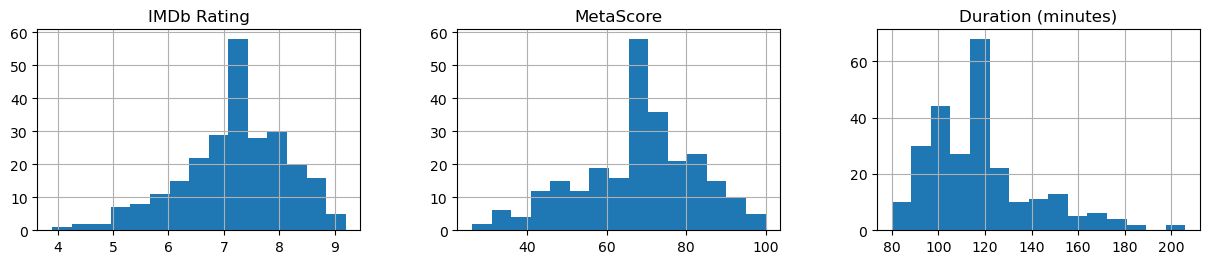

In [148]:
# Histograms for numerical features
numerical_cols = ['IMDb Rating', 'MetaScore', 'Duration (minutes)']
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

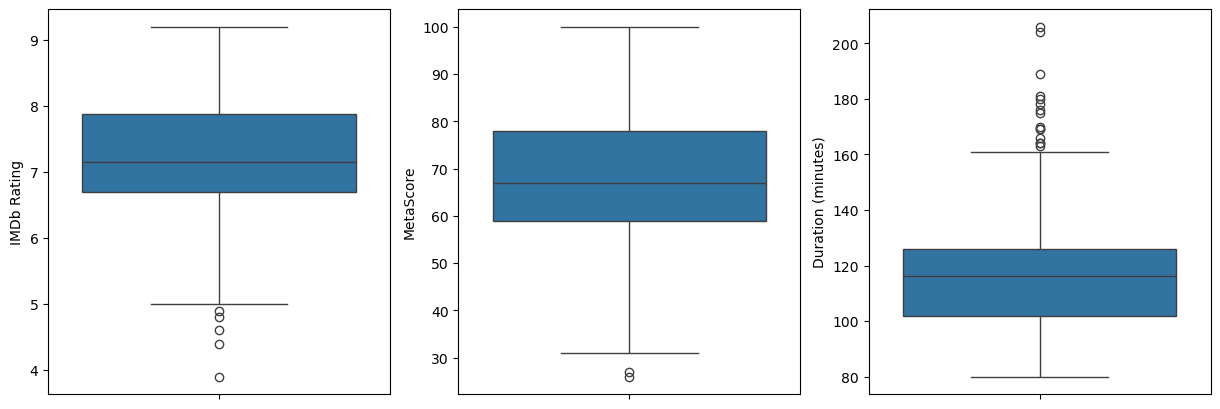

In [150]:
# Box plots for numerical features
plt.figure(figsize = (15,5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=col, data=df)
plt.show()

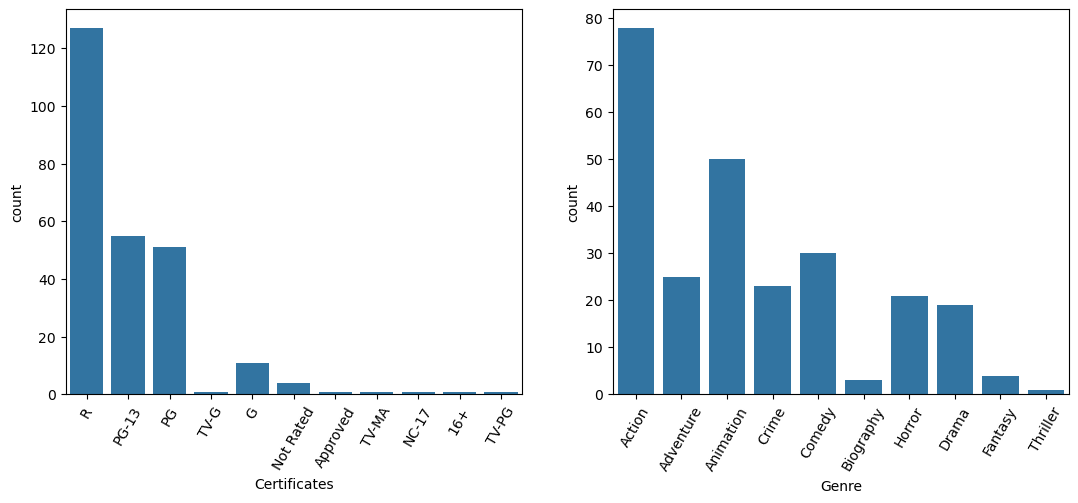

In [152]:
# Bar plots for categorical features
categorical_cols = ['Certificates', 'Genre']
plt.figure(figsize=(20, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=60)
plt.show()


Correlation Matrix:
                    IMDb Rating  MetaScore  Duration (minutes)
IMDb Rating            1.000000   0.702468            0.375474
MetaScore              0.702468   1.000000            0.181701
Duration (minutes)     0.375474   0.181701            1.000000


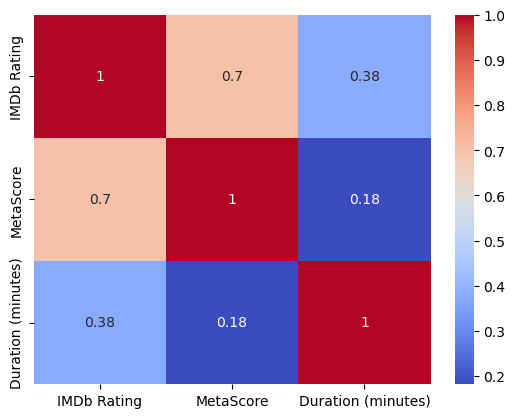

In [156]:
# Correlation matrix with pearson
correlation_matrix = df[numerical_cols].corr(method = 'pearson') 
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



Correlation Matrix:
                    IMDb Rating  MetaScore  Duration (minutes)
IMDb Rating            1.000000   0.684661             0.34444
MetaScore              0.684661   1.000000             0.17244
Duration (minutes)     0.344440   0.172440             1.00000


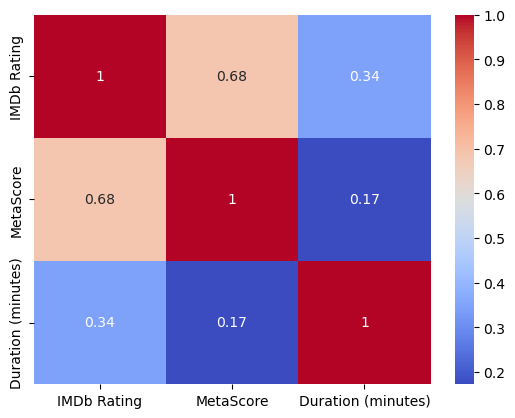

In [104]:
# Correlation matrix with spearman
correlation_matrix = df[numerical_cols].corr(method = 'spearman') 
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



Correlation Matrix:
                    IMDb Rating  MetaScore  Duration (minutes)
IMDb Rating            1.000000   0.519157            0.243760
MetaScore              0.519157   1.000000            0.113985
Duration (minutes)     0.243760   0.113985            1.000000


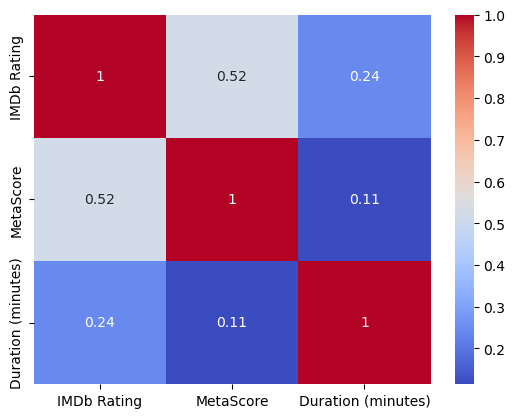

In [158]:
# Correlation matrix with kendall
correlation_matrix = df[numerical_cols].corr(method = 'kendall') 
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

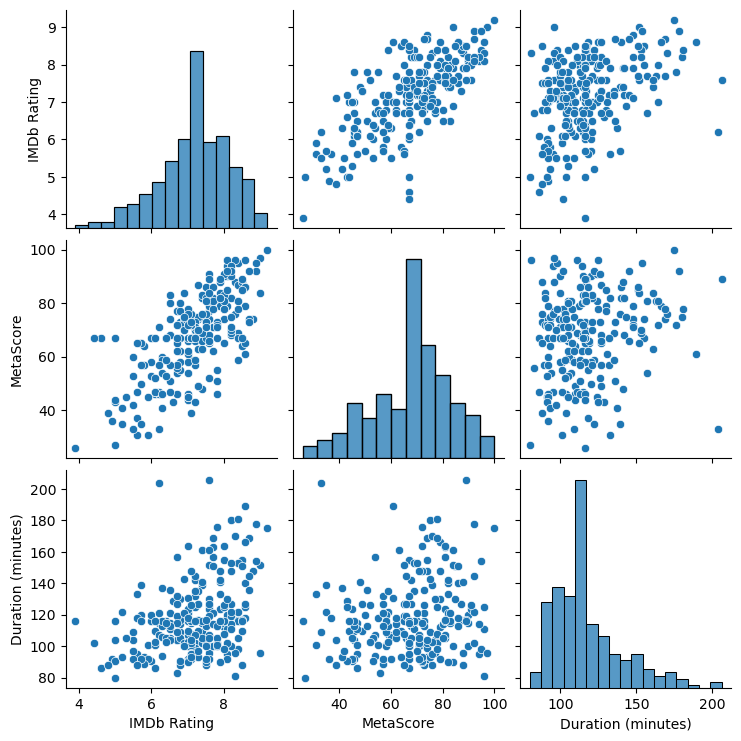

In [160]:
# Scatter plots for numerical features
sns.pairplot(df[numerical_cols])
plt.show()